In [9]:
import chart_studio.plotly as py  
import plotly.graph_objs as go  
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)  
import pandas as pd  

### Step 1: Create a Data Dictionary

The first step is to create a data dictionary that actually contains the data that you want to display on the map. To do this, execute the following script, which I will explain line by line after that.

In [1]:
map_data = dict(type='choropleth',  
            locations=['MI', 'CO', 'FL', 'IN'],
            locationmode='USA-states',
            colorscale='Portland',
            text=['Michigan', 'Colorado', 'Florida', 'Indiana'],
            z=[1.0,2.0,3.0,4.0],
            colorbar=dict(title="USA States")
           )

You need to specify values for several keys in the data dictionary. They are as follows:

1. `type`: Since we are using choropleth maps, the type will always be choropleth.
2. `locations`: Here we need to pass the abbreviations for the states that we want to display on our map. Four states will be displayed on our map: 'Michigan (MI)', 'Colorado (CO)', 'Florida (FL), 'Indiana (IN)'
3. `locationmode` will be `USA-state` since we are only displaying the map for the United States.
4. `colorscale`: This key is used to specify the color of the plot. Check the documentation for more color options.
5. `text`: Contains a list of strings that will be displayed when the mouse hovers over the state location.
6. The `z` key contains a list of numerical values that will be displayed when the mouse hovers over the state location.
7. `colorbar` is a dictionary. For the title key, you can specify the text that will be displayed on the color bar.


### Step 2: Create a Layout

Once, you have created a data dictionary, the next step is to create the layout dictionary. The layout dictionary for USA is simple as shown in the following script.

In [2]:
map_layout = dict(geo = {'scope':'usa'})

The dictionary takes another dictionary named `geo`. We passed the value "usa" for the `scope` key since our map is only limited to USA.

### Step 3: Create Graph Object

If you look at the section where we imported the libraries, we imported the `plotly.graph_objs` class. The third step is to create an object of this graph. To do so we need to call the `Figure` function from the object. The object takes two parameters: `data` and `layout`. We will pass our data dictionary to the first parameter and the layout dictionary to the second parameter, as shown below:


In [10]:
map_actual = go.Figure(data=[map_data], layout=map_layout)

### Step 4: Call iplot() Method

The final step is to call the `iplot()` function and pass it the graph object that we created in the third step as shown below:

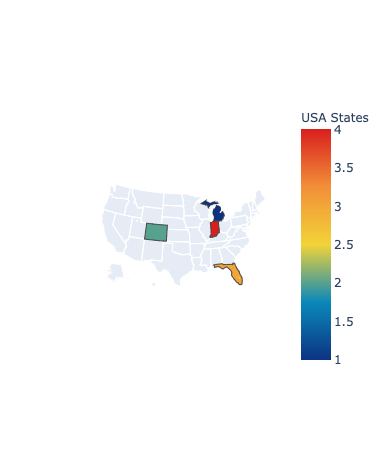

In [11]:
iplot(map_actual) 

# Section 2: Geographical Maps for the United States Using CSV

Now we have a basic idea of how we can create geographical plots using Plotly and choropleth maps. Let us now create a more complex map. We will see how we can use data from a CSV file to create a geographical plot. We will create a geographical map that will display the Per Capita GDP for all the states in the United States.

In [15]:
# https://www.kaggle.com/solorzano/gdp-per-capita-in-us-states?select=bea-gdp-by-state.csv
#TODO: use the API
df = pd.read_csv('datasets_35620_48237_bea-gdp-by-state.csv')  

In [16]:
df.head()

,Fips,Area,2013,2014,2015,2016,2017
0,0,United States,48534,49329,50301,50660,51337
1,1000,Alabama,36674,36473,36818,37158,37508
2,2000,Alaska,69711,67179,65971,63304,63610
3,4000,Arizona,38352,38534,38787,38940,39583
4,5000,Arkansas,35888,36265,36295,36502,36714


The dataset contains the names of the states in USA in the `Area` column. The dataset also contains the Per Capita GDP for the five years from 2013 to 2017. We will plot the data for the year 2017.

One problem with the dataset is that it contains full names of the states, while the choropleth maps accept the abbreviation for the state name so we need to map it

In [17]:
us_state_abbrev = {  
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

The next step is to add a column in the dataset that contains abbreviations. We can do so by mapping the values in the `Area` column to the keys in the `us_state_abbrev` dictionary. The corresponding values can then be added to the newly created abbreviation column as shown below:

In [20]:
df['abbrev'] = df['Area'].map(us_state_abbrev)

In [22]:
df.head()

,Fips,Area,2013,2014,2015,2016,2017,abbrev
0,0,United States,48534,49329,50301,50660,51337,NaN
1,1000,Alabama,36674,36473,36818,37158,37508,AL
2,2000,Alaska,69711,67179,65971,63304,63610,AK
3,4000,Arizona,38352,38534,38787,38940,39583,AZ
4,5000,Arkansas,35888,36265,36295,36502,36714,AR


In [23]:
map_data = dict(type='choropleth',  
                locations=df['abbrev'],
                locationmode='USA-states',
                colorscale='Reds',
                text=df['Area'],
                marker=dict(line=dict(color='rgb(255,0,0)', width=0.5)),
                z=df['2017'],
                colorbar=dict(title="GDP Per Capita - 2017")
           )

You can see that in the above script, for the `locations` key we are passing the `abbrev` column of our dataset. This means that the geographical plot for all the states in the United States will be printed on the screen.

Similarly, for the `text` key we are passing the "Area" column that contains the full name of the state. Finally, for the `z` key, we pass the Per capita GDP for the year 2017.

It is also important to mention that we have a new key here i.e. `marker`. This is used to create a border between different states. An RGB value of `255,0,0` means that the border will be red. A width of 2 specifies the width of the border is 2 pixels.

The next step is to create the layout for our map. The following script does that:

In [24]:
map_layout = dict(title='USA States GDP Per Capita - 2017',  
                    geo=dict(scope='usa')
             )

Finally, you need to create the graph object and pass it the data and layout dictionaries, as we did in the last section. Look at the following script:

In [25]:
map_actual = go.Figure(data=[map_data], layout=map_layout)  

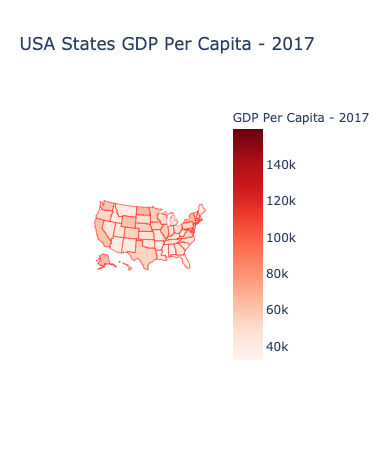

In [26]:
iplot(map_actual)  

# Section 3: Geographical Maps for the World
